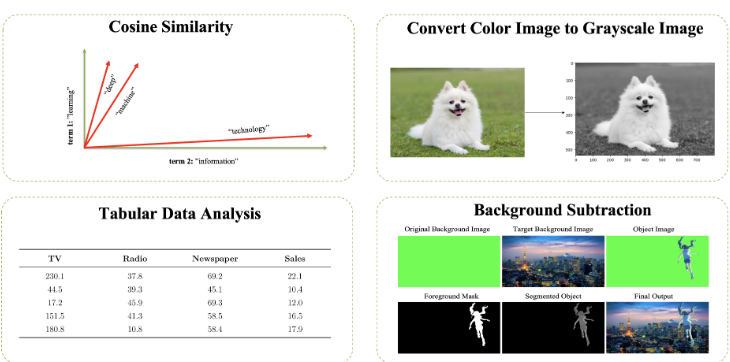

In [615]:
import numpy as np
from typing import Union, List, Tuple

#? Union[List, np.ndarray]) mean this variable 'vector' can be either datatypes inside the square bracket []
#? -> Tuple[int, ...] notify numpy vector shape return a tuple (e.g., (3,), (2, 4), (5, 5, 5)), and that is true.
def vector_shape(vector: Union[List, np.ndarray]) -> Tuple[int, ...]:
    # convert to numpy array if input is a list
    if isinstance(vector, list):
        vector = np.ndarray(vector)

    return vector.shape # return length of vector

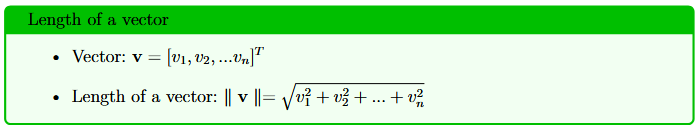

In [616]:
def compute_vector_length(array):
    print(array)
    if isinstance(array, list):
        #? np.array is a function that returns a np.ndarray object, <class 'numpy.ndarray'>
        array = np.array(array)
        print('datatype:', type(array))

    # vector_length = np.linalg.norm(array) #? L2 norm
    # vector_length =  np.sqrt(np.sum([x**2 for x in array]))
    vector_length =  np.sqrt(np.sum(array**2))

    return vector_length


In [617]:

#? Note that ndarray is a datatype.
def dot_product(v1: np.ndarray, v2: np.ndarray):
    result = np.dot(v1, v2)
    return result

In [618]:
arr = np.array([2,3,4])
# np.sqrt(np.sum(np.arr2))
# print(compute_vector_length(arr))


# v1 = np.array([[-1, 1, 1], [0, -4, 9]])
# v2 = np.array([0, 2, 1])

v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = dot_product(v1=v1, v2=v2) # 1*2 + 2*3
round(result, 2)


4

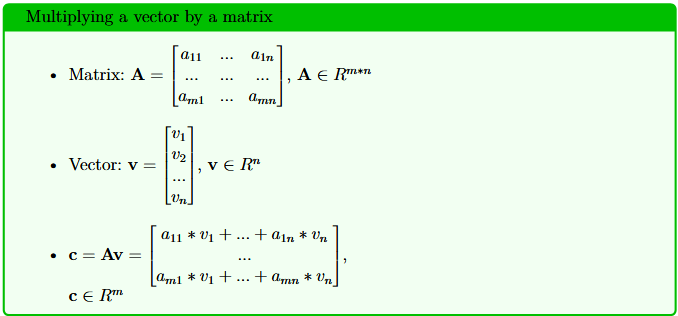

In [619]:
def matrix_multi_vector(matrix, vector):
    # if number of matrix column == vector length

    if matrix.shape[1] == vector.shape[0]:
        result = np.dot(matrix, vector)



    else:
        return "Make sure matrix columns == vector length"

    return result

matrix = np.array([[-1, 1, 1], [0, -4, 9]])
vector = np.array([0, 2, 1])
matrix_multi_vector(matrix, vector)

array([3, 1])

In [620]:
def matrix_multi_matrix(matrix1, matrix2):
    # if number of matrix column == vector length

    if matrix1.shape[1] == matrix2.shape[0]:
        result = np.dot(matrix1, matrix2)
    else:
        return "Make sure matrix columns == vector length"

    return result

matrix1 = np.array([[0,1,2], [2,-3,1]])
matrix2 = np.array([[1,-3], [6,1], [0,-1]])
matrix_multi_vector(matrix1, matrix2)

array([[  6,  -1],
       [-16, -10]])

## Cosine Similarity
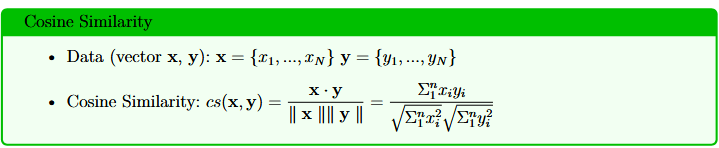

In [621]:
# v1 = [1,2,3,4]
# v2 = [1,0,3,0]

v1 = [1,2,3,4]
v2 = [1,0,3,0]

# def compute_cosine(x, y):
#     if isinstance(x, list):
#         x = np.array(x)
#     if isinstance(y, list):
#         y = np.array(y)

#     top = np.dot(x, y)
#     bot = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))

#     return top / bot

def compute_cosine(x, y):
    xy = np.sum([x * y for x, y in zip(x, y)])
    xx = np.sum([x1 * x2 for x1, x2 in zip(x, x)])
    yy = np.sum([y1 * y2 for y1, y2 in zip(y, y)])

    return xy / np.sqrt(xx * yy)

compute_cosine(v1, v2)

0.5773502691896257

### Background Substraction

### cv.imread Flags
cv2.IMREAD_COLOR (or 1): load image in full color (BGR format) and discard any transparentcy channel if present

cv2.IMREAD_GRAYSCALE (or 0): loads the image in grayscale mode, converting it to a single-channel image.

cv2.IMREAD_UNCHANGED (or -1):  loads the image as is, including the alpha channel if it exists. This results in a 4-channel image (BGR + Alpha) for images with transparency.


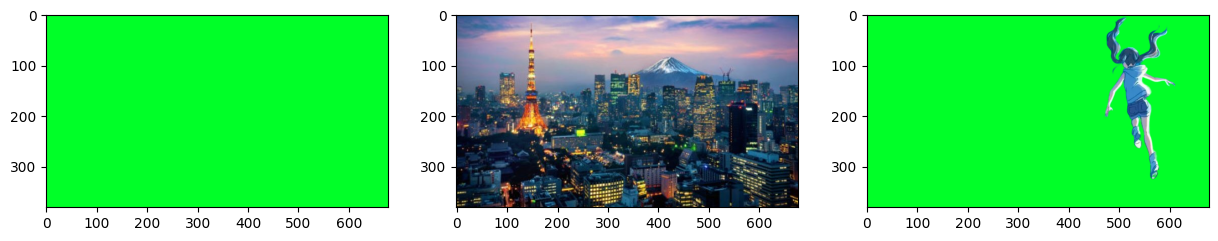

In [622]:
import cv2 as cv
import matplotlib.pyplot as plt

bg_img = cv.imread("img/GreenBackground.png", 1)
newbg_img = cv.imread("img/NewBackground.jpg", 1)
object_img = cv.imread("img/Object.png", 1)

bg_img_rgb = cv.cvtColor(bg_img, cv.COLOR_BGR2RGB)
newbg_img_rgb = cv.cvtColor(newbg_img, cv.COLOR_BGR2RGB)
object_img_rgb = cv.cvtColor(object_img, cv.COLOR_BGR2RGB)



plt.figure(figsize=(15, 10)) # width, height
plt.subplot(1,3,1) # 1 row, 2 col, 1st plot
plt.imshow(bg_img_rgb)

plt.subplot(1,3,2) # 1 row, 2 col, 2nd plot
plt.imshow(newbg_img_rgb)

plt.subplot(1,3,3) # 1 row, 2 col, 3rd plot
plt.imshow(object_img_rgb)
plt.show()

### Make sure all the Image have the same size

### Modify Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.5].


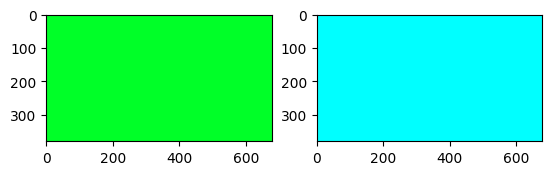

In [623]:
gray_scale_img = bg_img_rgb.copy() * np.array([0.5, 0.9, 0.9])

plt.subplot(1,2,1)
plt.imshow(bg_img_rgb, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(gray_scale_img, cmap='gray')

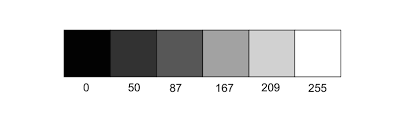

float64
(381, 678)


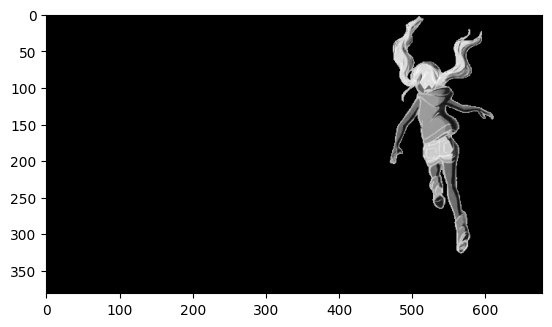

In [624]:
def compute_difference(bg_img, input_img):
    if bg_img.shape == input_img.shape:
        #? Normalize all color channel into 1 channel to compute different faster and easier
        # input_img = cv.cvtColor(input_img, cv.COLOR_RGB2GRAY)
        # bg_img = cv.cvtColor(bg_img, cv.COLOR_RGB2GRAY)

        #? Calculate different on 1 color channel
        # Get absolute value from bg and obj substraction
        # Then normalization by calc mean for r,g,b
        #? This way, we don't have to deal with mis-alginment value from all 3 color-channels
        segment_object = np.abs(bg_img - input_img).mean(axis=2)
        return segment_object
    else:
        print('Background image shape must have the same dimension as Object Image')

#? segment_object
difference_single_channel = compute_difference(bg_img, object_img)
plt.imshow(difference_single_channel, cmap='gray')
print(difference_single_channel.dtype) #? uint increase as number of channel increase
print(difference_single_channel.shape)

In [625]:
def compute_binary_mask(difference_single_channel):
    #? substract to clear green bg which have value of 0, if there any value > 1, then replace with 255
    binary_mask = np.where(difference_single_channel > 1, 255, 0) #? 255 if TRUE else 0

    #? Stack another dimension to binary_mask.
    #? Convert binary mask to 3 dimension again, but the 3rd dimension is 1 color channel, which represent (black, white)
    binary_mask = np.stack((binary_mask, ), axis=2)

    return binary_mask

In [626]:
object_img_rgb.shape # (381, 678, 3)
newbg_img_rgb.shape # (408, 612, 3)

(381, 678, 3)

(381, 678, 1)
int32


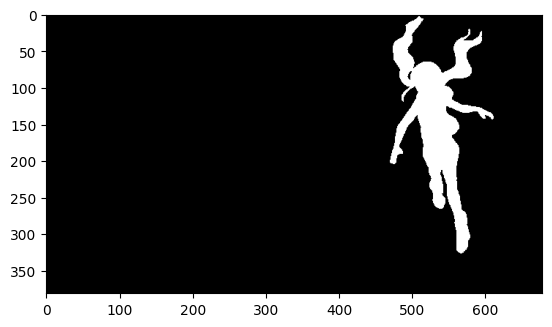

In [627]:
binary_mask = compute_binary_mask(difference_single_channel)
plt.imshow(binary_mask, cmap='gray')
print(binary_mask.shape)
print(binary_mask.dtype)

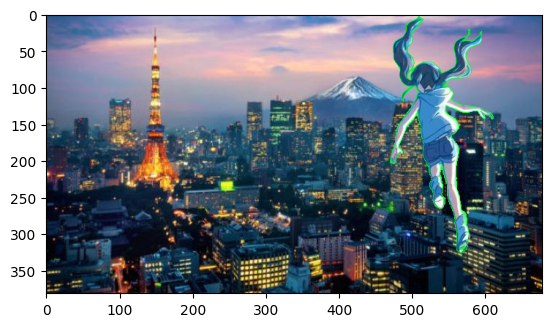

In [628]:
def replace_background(bg1_img, bg2_img, obj_img):
    difference_single_channel = compute_difference(bg1_img, obj_img)
    binary_mask = compute_binary_mask(difference_single_channel)

    output = np.where(binary_mask==255, obj_img, bg2_img)
    return output

output = replace_background(bg_img, newbg_img, object_img)
output = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

In [629]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result, 2))

[-2  4  9 21]
23.28


In [630]:
arr1 = np.arange(0, 10).reshape(2, -1)
arr2 = np.ones((2, 5), dtype=int)

arr = np.concatenate((arr1, arr2), axis=1)
print(arr)

[[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]


In [631]:
!gdown 1i9dqan21DjQoG5Q_VEvm0LrVwAlXD0vB

'gdown' is not recognized as an internal or external command,
operable program or batch file.


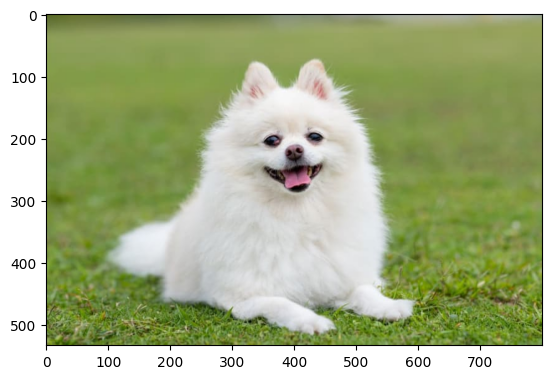

In [632]:
import matplotlib.image as mpimg # reads color images in RGB (Red, Green, Blue) order.

dog = cv.imread('img/dog.jpeg')
# dog = cv.cvtColor(dog, cv.COLOR_BGR2RGB) # convert to RGB
dog = mpimg.imread("img/dog.jpeg")
r = dog[:, :, 0] # height x width
g = dog[:, :, 1]
b = dog[:, :, 2]


# print('red', r[0, 0])
# print(g[0, 0])
# print(b[0, 0])

plt.imshow(dog)

102.5


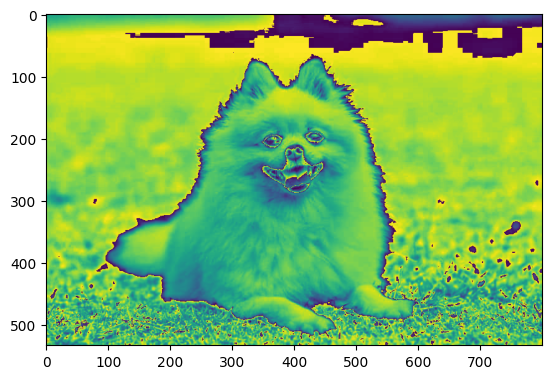

In [633]:
# axis = 2, min & max(dog[x, y, 0], dog[x, y, 1], dog[x, y, 2])
# gray_img_01 = (np.max([r, g, b]) + np.min([r,g,b])) / 2
gray_img_01 = (np.max(dog, axis=2) + np.min(dog, axis=2)) / 2
print(gray_img_01[0, 0])
plt.imshow(gray_img_01)

107.66666666666667


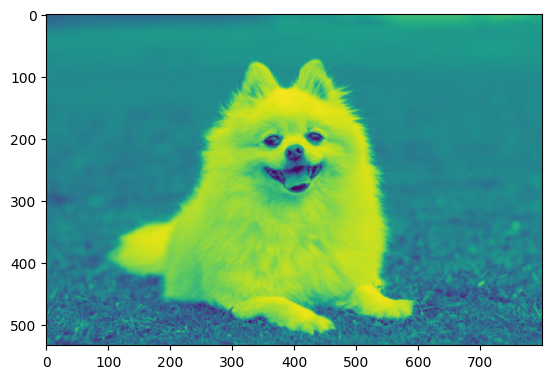

In [634]:

#? Get the average color value from the image
gray_img_02 = np.average(dog, axis=2)
print(gray_img_02[0, 0])
plt.imshow(gray_img_02)

107.66666666666667


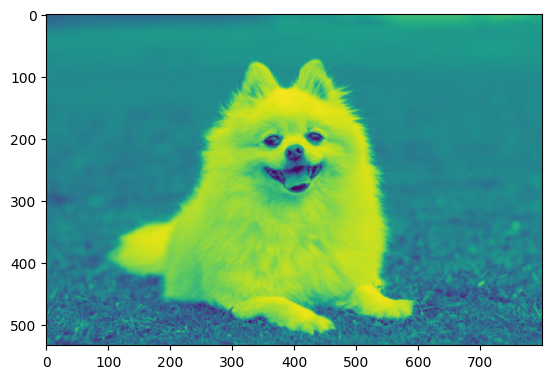

In [635]:
gray_img_02 = np.average(dog, axis=2)
print(gray_img_02[0, 0])
plt.imshow(gray_img_02)

126.22999999999999


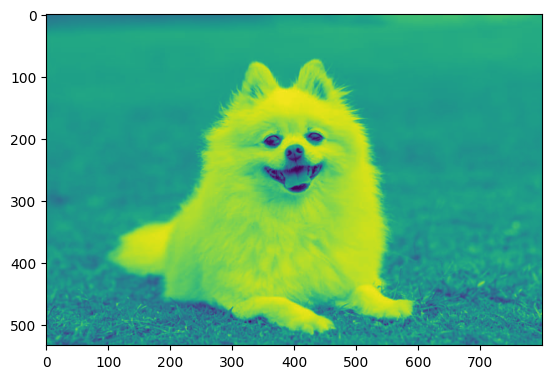

In [636]:
gray_img_03 = 0.21*r + 0.72*g + 0.07*b
print(gray_img_03[0, 0])
plt.imshow(gray_img_03)

### cv.imread Flags
cv2.IMREAD_COLOR (or 1): load image in full color (BGR format) and discard any transparentcy channel if present

cv2.IMREAD_GRAYSCALE (or 0): loads the image in grayscale mode, converting it to a single-channel image.

cv2.IMREAD_UNCHANGED (or -1):  loads the image as is, including the alpha channel if it exists. This results in a 4-channel image (BGR + Alpha) for images with transparency.


(381, 678)


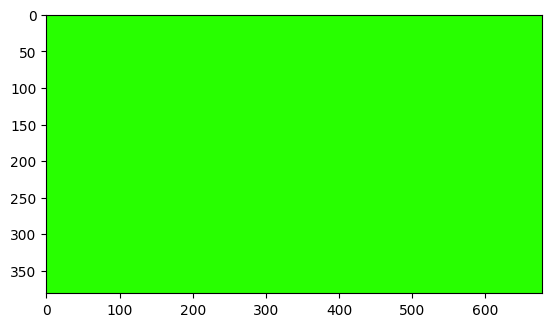

In [637]:
bg1_image = cv.imread("img/GreenBackground.png", 1)
bg1_image = cv.resize(bg1_image, (678, 381))

ob_image = cv.imread("img/Object.png", 1)
ob_image = cv.resize(ob_image, (678, 381))

plt.imshow(bg1_image)


difference_single_channel = compute_difference(bg1_image, ob_image)
print(difference_single_channel.shape)

int32


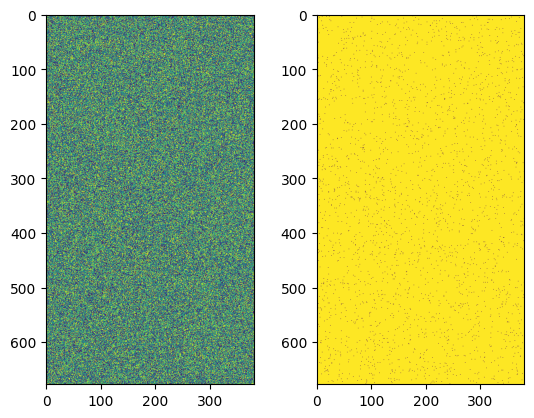

In [638]:
difference_single_channel = np.random.rand(678, 381) * 100
binary_mask = np.where(difference_single_channel > 1, 255, 0)
print(binary_mask.dtype)

plt.subplot(1, 2, 1)
plt.imshow(difference_single_channel)
plt.subplot(1, 2, 2)
plt.imshow(binary_mask)

## Analyze Tabular Data

In [639]:
import pandas as pd

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [640]:
data = df.to_numpy()
sales = data[:, -1]
max_value = np.max(sales)
max_index = np.where(sales==max_value)[0] #? get index using value
print(f"Max: {max_value} - Index: {max_index}")

tv = data[:, 0]
mean_tv = np.mean(tv)
print(mean_tv)

Max: 27.0 - Index: [175]
147.0425


In [641]:
# a = [2,3,4,5,2,2,2]
count = np.sum(sales >= 20)
count

40

In [ ]:
radio = data[:, 1]
sales_20 = np.where(sales >= 15) #? index
index_where_sales20 = data[sales_20, 1] #? in numpy we can index continuously
radio_mean = np.mean(index_where_sales20)
radio_mean

26.22293577981651

In [653]:
newpaper = data[:, 2]
mean_newpaper = np.mean(newpaper)
condition_index = np.where(newpaper >= mean_newpaper) #? index
data_at_index = data[condition_index, -1] #? in numpy we can index continuously
sum_sale = np.sum(data_at_index)
sum_sale

1405.1